# CS 5010 Homework 3

# Kip McCharen (cam7cu)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#I see that Seaborn has built in datasets, so what are they?
seaborn.get_dataset_names()

C:\Users\kipmc\anaconda3\envs\viz\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\kipmc\anaconda3\envs\viz\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [96]:
# Never seen the planets one before, let's check it out
planets = sns.load_dataset('planets')
print(planets.head())

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


Text(0.5, 1.0, 'Line Graph of Distance over time for planet 1 measured with Radial Velocity')

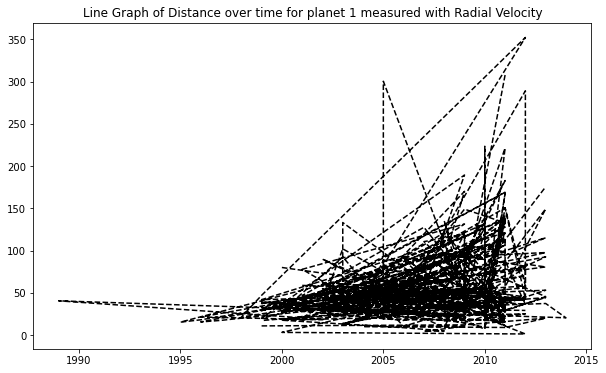

In [97]:
#OK that'll do
tmp = planets[(planets.number==1) & (planets.method == 'Radial Velocity')]
plt.plot(tmp.year, tmp.distance, 'k--')
plt.title("Line Graph of Distance over time for planet 1 measured with Radial Velocity", loc='center')

In [98]:
# Does that even count as a line graph? 
avgs = planets[(planets.method == "Radial Velocity") & (planets.year > 2006)][['number','year','distance']]
avgs = avgs.groupby(["number", "year"]).mean().reset_index()
avgs = avgs.sort_values(by=["number",'year']).dropna()
avgs = pd.crosstab(avgs.number,avgs.year, values=avgs.distance, aggfunc='mean')
print(avgs.head())

year         2007       2008       2009       2010       2011       2012  \
number                                                                     
1       67.893913  62.001600  65.083400  56.800000  90.996829  79.116667   
2       38.930000  65.219167  63.091538  56.690909  41.654333  48.726667   
3       58.695000  26.150000  30.685000  16.130000  24.121053  53.640000   
4             NaN        NaN        NaN   9.085000        NaN        NaN   
5       12.530000        NaN        NaN        NaN  12.530000        NaN   

year         2013   2014  
number                    
1       82.838182  20.48  
2       52.906000  68.54  
3       14.970000    NaN  
4             NaN    NaN  
5             NaN    NaN  


Text(0.5, 1.0, 'Bar chart of average distance by year for each planet number')

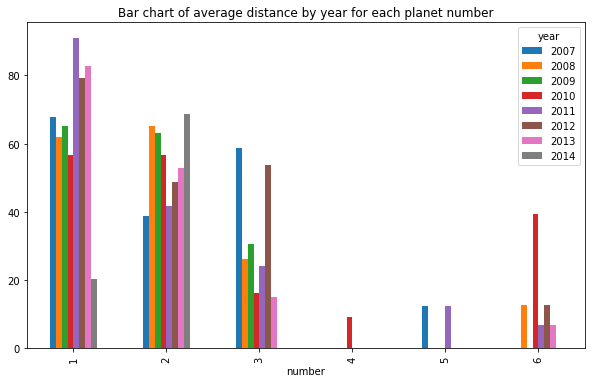

In [99]:
avgs.plot.bar()
plt.title("Bar chart of average distance by year for each planet number", loc='center')

Text(0.5, 1.0, 'Histogram of Planet Distance, with 20 bins')

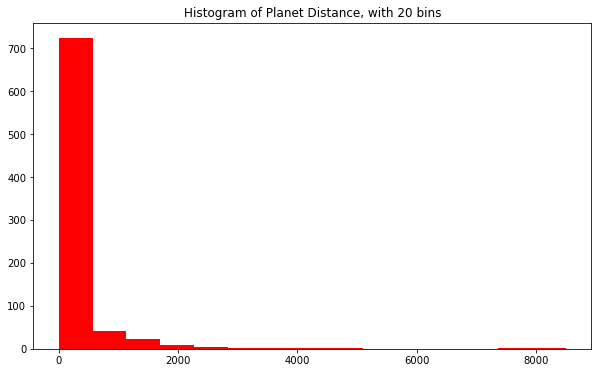

In [102]:
# It looks like the planets are different. I don't know anything about planets, but that's neat. 
# I assume the distance is changing differently over time as different planets are farther from the sun. 

plt.hist(planets.distance, bins=15, color=['r']) #grouped into 20 categories by contiguous size, colored r for Red
plt.title("Histogram of Planet Distance, with 20 bins", loc='center')
#Let's see how the average distance stacks up
# I have no sense of scale on how far away planets are, I just know I'm never going to visit one. That's wild!

Text(0.5, 1.0, 'Scatterplot of Planet Distance vs. Mass')

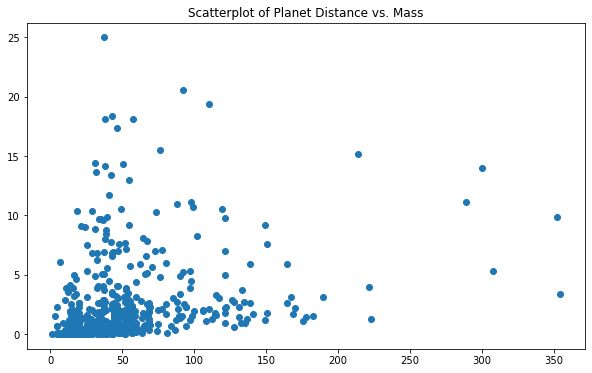

In [103]:
# That is quite a wide distribution, not nearly normal. 

plt.scatter(planets.distance, planets.mass)
plt.title("Scatterplot of Planet Distance vs. Mass", loc='center')

Text(0.5, 1.0, 'Box Plots of Mass by Planet Number')

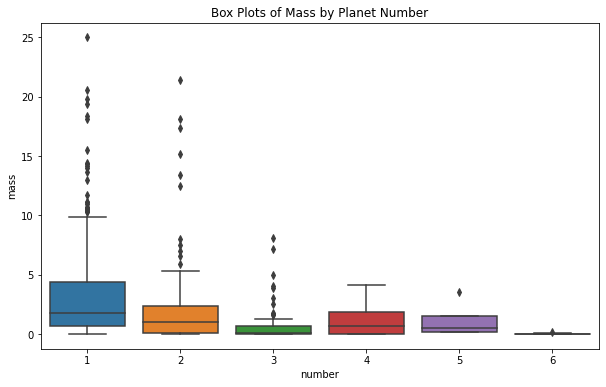

In [104]:
import seaborn as sns
pmass = planets[planets.method == "Radial Velocity"][['number','mass']].dropna()
sns.boxplot(data=pmass, x='number', y='mass')
plt.title('Box Plots of Mass by Planet Number')
# thanks to Seaborn for making boxplots way easier than matplotlib
# That is quite a wide range and distribution. I don't know what it means, but it's interesting. 